In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv('raw_data/tmdb_5000_credits.csv')
df.head() #view data

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [98]:
score = np.zeros(len(df.index)) #initalize scores
g =[0]*len(df.index) #initialize gender list for all movies
for m in df.index: #loop over all movies
    m_all = True #debug boolean
    #extract movie
    cast = json.loads(df['cast'][m]) #extract cast from dataset
    n = len(cast) #number of cast members
    gendernos = np.zeros(n)
    if n == 0 or n == []: #no cast listed
        score[m] = np.nan #nan for no cast
        m_all = False #debug boolean
    else:
        #asymmetrical sigmoidal curve fit from https://mycurvefit.com/
        weights = [ 0.00557557 + (1.002644 - 0.00557557)/(1 + (x/1.794024)**8.661941)**0.5556762
               for x in np.linspace(1,10,20)] #weight lead roles more (up to 20 roles)
        if n > 20: #more than 20 memebrs in cast
            ind = range(0,20)
        else: #less than 20 members in cast
            ind = range(0,n)
        for c in ind: #loop over all cast members
            gendernos[c] = cast[c]['gender']
            if cast[c]['gender'] == 1: #female
                score[m] = score[m] + weights[c] #female cast members boost score
                m_all = False #debug boolean
            elif cast[c]['gender'] != 2: #not female nor male gender number
                weights[c] = 0; #discount entry
        score[m] = score[m]/sum(weights[:c+1]) #take the weighted average of the score
        g[m] = gendernos #store gender numbers into gender list
        if score[m] == np.inf:
            score[m] = np.nan
            m_all = False #debug boolean
    #DEBUGGING ONLY
    #if m_all:
         #score[m] = -1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [99]:
#extract nan values to find real score
score_real = score[np.argwhere(~np.isnan(score))]
len(score_real) #check size of real values

4717

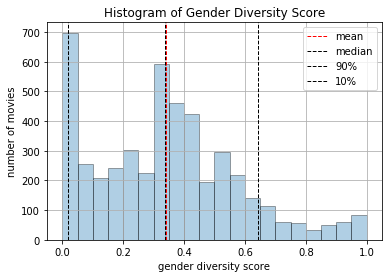

In [125]:
#plot results
n_bins = 20
fig, ax = plt.subplots()
n, bins, patches = plt.hist(score_real, bins=n_bins, alpha=0.35, edgecolor='k')
ax.set(xlabel='gender diversity score', ylabel='number of movies',
       title='Histogram of Gender Diversity Score')
ax.grid()
mean = plt.axvline(score_real.mean(), color='r', linestyle='dashed', linewidth=1)
median = plt.axvline(np.percentile(score_real,50), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(score_real,25), color='r', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(score_real,75), color='r', linestyle='dashed', linewidth=1)
ninety = plt.axvline(np.percentile(score_real,90), color='k', linestyle='dashed', linewidth=1)
ten = plt.axvline(np.percentile(score_real,10), color='k', linestyle='dashed', linewidth=1)
ax.legend((mean, median, ninety, ten), ('mean','median','90%','10%'))
